#### DTUMOS 0단계  
-시뮬레이션을 하는 데이터를 시뮬레이션 module에 맞게 정제하며, 본인이 원하는 분석 시간 범위를 결정한다.

1.	Download your dataset for New York Taxi Trips: https://www.kaggle.com/competitions/nyc-taxi-trip-duration/data     
2. To read and write the data, create these sub folders in your DTUMOS Folder:    
        - DTUMOS -> data  
        - data -> raw_data -> "Keep your train.csv from the dataset here and any other required files"    
        - data -> result_data -> all_data  
        - data -> result_data -> dashboard_plot   
        - data -> result_data -> simulation_data  
3. Download and Install Anaconda, set the correct paths.      
        Create a Conda Env by running the following commands in your VS Code terminal:    
        - conda create -n dtumos python=3.11.11 -y  
        - conda activate dtumos  
3.	Create Jupyter Kernel:  
        - python -m ipykernel install --user --name dtumos --display-name " DTUMOS"  
4.	Install the required Libraries in that kernel by running the requirements.txt in the next cell.  

In [ ]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
from shapely.geometry import Point

taxi_raw_data = pd.read_csv("./data/raw_data/train.csv")
essential_columns = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
taxi_raw_data = taxi_raw_data[essential_columns]

taxi_raw_data = taxi_raw_data.rename(columns={'id':'taxi_id', 'pickup_datetime':'ride_time','dropoff_datetime':'alight_time',
                                              'pickup_longitude':'ride_lon', 'pickup_latitude':'ride_lat', 'dropoff_longitude':'alight_lon', 
                                              'dropoff_latitude':'alight_lat'})

# 문자열로 되어 있는 시간을 datetime type으로 변경
taxi_raw_data['ride_time'] = pd.to_datetime(taxi_raw_data['ride_time'], format='%Y-%m-%d %H:%M:%S')
# taxi_raw_data['ride_time'] = pd.to_datetime(taxi_raw_data['ride_time'], format='%m-%d-%Y %H:%M')
taxi_raw_data['alight_time'] = pd.to_datetime(taxi_raw_data['alight_time'], format='%Y-%m-%d %H:%M:%S')
# taxi_raw_data['alight_time'] = pd.to_datetime(taxi_raw_data['alight_time'], format='%m-%d-%Y %H:%M')

# 분석 타겟 시간은 2016-04-08 
taxi_raw_data = taxi_raw_data.loc[(taxi_raw_data['ride_time'] >= pd.Timestamp(2016,4,8)) & (taxi_raw_data['alight_time'] < pd.Timestamp(2016,4,9))]

taxi_raw_data['ride_geometry'] = [Point(i[0],i[1]) for i in taxi_raw_data[['ride_lon', 'ride_lat']].values]
taxi_raw_data['alight_geometry'] = [Point(i[0],i[1]) for i in taxi_raw_data[['alight_lon', 'alight_lat']].values]

c:\Users\Mubarak\anaconda3\envs\dtumos\Lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\Mubarak\anaconda3\envs\dtumos\Lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [3]:
print(taxi_raw_data.head())

       taxi_id           ride_time         alight_time   ride_lon   ride_lat  \
278  id2165807 2016-04-08 20:19:55 2016-04-08 20:23:06 -74.003929  40.725796   
384  id2899891 2016-04-08 15:26:22 2016-04-08 15:38:13 -73.974197  40.757496   
507  id1647538 2016-04-08 19:54:06 2016-04-08 20:05:41 -73.980942  40.757832   
974  id2299069 2016-04-08 00:26:47 2016-04-08 00:35:37 -73.983269  40.757763   
989  id0862403 2016-04-08 07:05:14 2016-04-08 07:19:43 -73.982399  40.777493   

     alight_lon  alight_lat                                 ride_geometry  \
278  -73.998878   40.734764  POINT (-74.00392913818358 40.72579574584961)   
384  -73.959839   40.775490  POINT (-73.97419738769531 40.75749588012695)   
507  -73.991051   40.760487  POINT (-73.98094177246092 40.75783157348633)   
974  -73.968132   40.757317  POINT (-73.98326873779298 40.75776290893555)   
989  -73.939621   40.805264   POINT (-73.9823989868164 40.77749252319336)   

                                  alight_geometry  
278 

In [4]:
taxi_raw_data.shape

(9061, 9)

In [5]:
# print("Sample ride_time values:")

print("\nNumber of invalid timestamps:", taxi_raw_data['ride_time'].isna().sum())


Number of invalid timestamps: 0


---
#### DTUMOS 1단계
- convert_data.py
    - generate_random_location.py

In [6]:
import sys
print(sys.executable)

c:\Users\Mubarak\anaconda3\envs\dtumos\python.exe


In [7]:
from module.convert_data import generate_simulation_base_data
passenger, taxi, YMD = generate_simulation_base_data(taxi_raw_data, target_place='New York County')

---

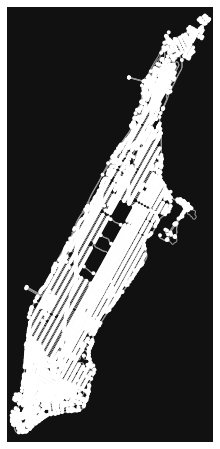

(<Figure size 576x576 with 1 Axes>, <Axes: >)

In [8]:
import osmnx as ox

# Download and plot a map of a city
place = "New York County"
graph = ox.graph_from_place(place, network_type="drive")
ox.plot_graph(graph)

To Connect to OSRM:
1. Download the latest New York OSM file in pbf format, possibly from: https://download.geofabrik.de/north-america/us/new-york.html and save it in raw_data folder. 
2. Download, install and run the Docker.   
3. Install WSL in your Windows PowerShell and start it.     
4. Go to the directory in which your downloaded New York OSM is located. 
5. Run the following 4 commands one at a time in the following order:  
 - docker run -t -v "${PWD}:/data" ghcr.io/project-osrm/osrm-backend osrm-extract -p /opt/car.lua /data/new-york-latest.osm.pbf || echo "osrm-extract failed"
 - docker run -t -v "${PWD}:/data" ghcr.io/project-osrm/osrm-backend osrm-partition /data/new-york-latest.osrm || echo "osrm-partition failed"  
 - docker run -t -v "${PWD}:/data" ghcr.io/project-osrm/osrm-backend osrm-customize /data/new-york-latest.osrm || echo "osrm-customize failed"    
 - docker run -t -i -p 5000:5000 -v "${PWD}:/data" ghcr.io/project-osrm/osrm-backend osrm-routed --algorithm mld /data/new-york-latest.osrm  
6. Run the next cell.    


In [10]:
from module.dispatch_helper import *
from module.dashboard_plot import *
import pickle

result = dispatch_module(passenger, taxi, YMD, dispatch_mode='OSRM')

#all data save
result[2].extend([passenger, taxi, YMD])

with open('./data/result_data/all_data/result.pickle', 'wb') as f:
    pickle.dump(result, f)

100%|██████████| 1440/1440 [1:20:39<00:00,  3.36s/it]


In [11]:
from module.dashboard_plot import *
import pickle

with open('./data/result_data/all_data/result.pickle', 'rb') as f:
    result = pickle.load(f)
    
make_dashboard_plot(result, path='./data/result_data/dashboard_plot/')

complete_dash_plot!!


In [12]:
import json
import pickle

### simulation data save
trips_simulation_data, passenger_simulation_data , empty_taxi_simulation_data = result[0]

# trip
with open(f'./data/result_data/simulation_data/trip.json', 'w') as f:
    json.dump(trips_simulation_data,f)

# passenger
with open(f'./data/result_data/simulation_data/passenger.json', 'w') as f:
    json.dump(passenger_simulation_data,f)

# empty_taxi
with open(f'./data/result_data/simulation_data/empty_taxi.json', 'w') as f:
    json.dump(empty_taxi_simulation_data,f)